## Summary

* Minimize the 10,000 dimensional Rosenbrock with PMB, and with other algorithms in `scipy.optimize.minimize`.
* For comparison, iterations are limited to 200, or function calls are limited to 240 (based on the PMB result).
* Only L-BFGS-B algorithm performs better than PMB for this problem. Finds the global minimum rapidly.
* Conjugate Gradient, Newton-CG, and Truncated Newton algorithms quickly find a solution, but not the global minimum of 0.
* Powell, BFGS, COBYLA, and SLSQP algorithms do not stop after several minutes of runtime.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import minimize
from pmb_scipy import pmbsolve

In [2]:
def rosenbrock(x, args=()):
    return np.sum( 100*(x[1:]-x[:-1]**2)**2 + (x[:-1]-1)**2 )
        
def rosenbrock_der(x, args=()):
    g = np.zeros(len(x))
    g[1:-1] = 200*(x[1:-1] - x[:-2]**2) - 400*(x[2:] - x[1:-1]**2)*x[1:-1] + 2*(x[1:-1]-1)
    g[0] = -400*x[0]*(x[1]-x[0]**2) + 2*(x[0]-1)
    g[-1] = 200*(x[-1] - x[-2]**2)
    return g

In [3]:
n = 10000
x0 = 5.0 + np.random.rand(n)*10.0

## Solve with PMB

In [4]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method=pmbsolve, options={"maxiter":200})

227


In [5]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of outer iterations:", res.nit)
print("Number of inner iterations:", res.ninnerit)
print("Wallclock time:", res.time)

Maximum number of iterations (maxiter) is reached.
Final function value: 0.260690576576
Number of function evaluations: 227
Number of outer iterations: 200
Number of inner iterations: 52
Wallclock time: 0.22024297714233398


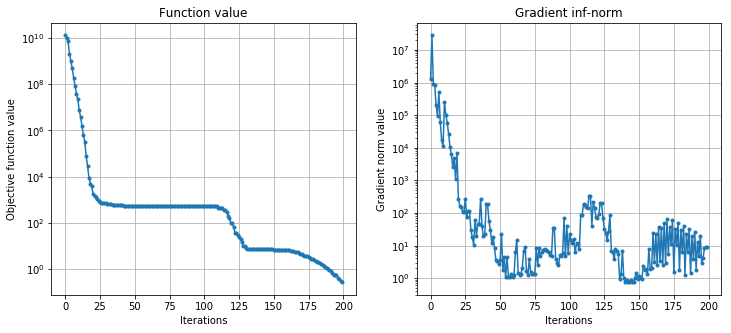

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.grid(True)
plt.semilogy(res.fhist,".-")
plt.xlabel("Iterations")
plt.ylabel("Objective function value")
plt.title("Function value")

# The gradient norm values vs. iteration    
plt.subplot(1,2,2)
plt.grid(True)
plt.semilogy(res.nghist,".-")
plt.xlabel("Iterations")
plt.ylabel("Gradient norm value")
plt.title("Gradient inf-norm");

## Solve with L-BFGS-B

In [7]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="L-BFGS-B",
               options={"maxiter":200, "maxcor":5})

In [8]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of iterations:", res.nit)

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Final function value: 9.1915963471e-10
Number of function evaluations: 149
Number of iterations: 130


Finds the solution to a higher accuracy with fewer function evaluations and iterations.

## Solve with Newton-CG

In [13]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="Newton-CG",
               options={"maxiter":200})

In [14]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of iterations:", res.nit)

Optimization terminated successfully.
Final function value: 8.67336238752156
Number of function evaluations: 22
Number of iterations: 18


This is fast, but converges to the incorrect solution.
Repeat several times with other random initial conditions:

In [17]:
for i in range(10):
    x0 = 5.0 + np.random.rand(n)*10.0
    res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="Newton-CG",
                   options={"maxiter":200})
    print(res.message)
    print("Final function value:", res.fun)
    print("Number of function evaluations:", res.nfev)
    print("Number of iterations:", res.nit)

Optimization terminated successfully.
Final function value: 5.52862564404387
Number of function evaluations: 17
Number of iterations: 16
Optimization terminated successfully.
Final function value: 3.888946734945616
Number of function evaluations: 23
Number of iterations: 18
Optimization terminated successfully.
Final function value: 1.3537657834350272
Number of function evaluations: 25
Number of iterations: 20
Optimization terminated successfully.
Final function value: 9.133073451441394
Number of function evaluations: 24
Number of iterations: 19
Optimization terminated successfully.
Final function value: 2.2207842077463074
Number of function evaluations: 25
Number of iterations: 20
Optimization terminated successfully.
Final function value: 8.06540641217542
Number of function evaluations: 22
Number of iterations: 18
Optimization terminated successfully.
Final function value: 7.225567904889411
Number of function evaluations: 19
Number of iterations: 16
Optimization terminated successful

This algorithm's results depend a lot on the starting point.

## Solve with Truncated Newton (TNC)

This one takes maximum function calls, not iterations.

In [9]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="TNC",
               options={"maxiter":240})

In [10]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of iterations:", res.nit)

Max. number of function evaluations reached
Final function value: 22474.5476682
Number of function evaluations: 240
Number of iterations: 22


Does not converge within the specified number of function calls.

## Conjugate gradient method (CG)

In [11]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="CG",
               options={"maxiter":200})

In [12]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of iterations:", res.nit)

Maximum number of iterations has been exceeded.
Final function value: 10927.814186728554
Number of function evaluations: 321
Number of iterations: 200


Does not converge within the specified number of iterations.

## Other methods

The following methods do not complete 200 iterations within several minutes. Computation interrupted.
* Powell
* BFGS
* COBYLA
* SLSQP